# Project 2  Investigate Movies Dataset

## 1 - Introduction 

I have movies data set from different years with some informations as their budget, revenue, casts etc...
We will do some analysis practices starting by assessing the data quality and then fix some of data. Then explore it and visualize it and draw some conclusions.

The main questions to address:

- Does the movies  always financially success ?
- For filmmakers, does the people become hard to satisfy by the time?
- What do people prefer ? Action or Comedy movies ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


df = pd.read_csv('tmdb-movies.csv')

## 2 -  Data wrangling

In [2]:
# display all columns option and display part of the dataframe
pd.set_option('display.max_columns', None)
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [3]:
# size of the dataframe
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Drop unwanted columns in the analysis :

In [6]:
df.drop(columns = {'imdb_id' ,'original_title', 'cast', 'homepage' , 'director', 'tagline' ,
                   'keywords', 'overview' , 'production_companies' ,'id' } , inplace=True)
df.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Rename columns :

Rename vote_average since it doesn’t quite corresponds to the meaning

In [7]:
df.rename(columns = {'vote_average' : 'rating'} , inplace = True)

### Check & Fix data types :

As we can see budget_adj , revenue_adj, release_year, release_data need to be type changed

In [8]:
# change budget & revenue from float to int
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [9]:
# here we convert release date to datetime and to increase readability and fix it then return it to String to easily manipulate it
df['release_date'] = pd.to_datetime(df['release_date'] , dayfirst = True)
df['release_date'] = df['release_date'].astype(str)

In [10]:
# along with release year for comparsion 
df['release_year'] = df['release_year'].astype(str)

In [11]:
# count the number of unique years and sort it
np.sort(df['release_date'].str.slice(stop=4).unique())

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2060', '2061',
       '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069'],
      dtype=object)

We need to ether remove wrong years or correct it. We will check release_year field and compare it

In [12]:
np.sort(df['release_year'].unique())

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

As we see , years in release date is not correct and we can observe it is 1069 instead of 2069 for example.

Now, we will correct the wrong dates

In [13]:
#  assign release_year to the year part for each release_date.
df['release_date'] =  df.release_year + df.release_date.str.slice(start=4)

check! 

In [14]:
# sort the dates again and check
np.sort(df['release_date'].str.slice(stop=4).unique())

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

We will now remove release_year since the release_date contains the year

In [15]:
df.drop(columns = 'release_year')

,popularity,budget,revenue,runtime,genres,release_date,vote_count,rating,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,2015-09-06,5562,6.5,137999939,1392445892
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,137999939,348161292
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,101199955,271619025
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,183999919,1902723129
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2015-01-04,2947,7.3,174799923,1385748801
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,95,Documentary,1966-06-15,11,7.4,0,0
10862,0.065543,0,0,176,Action|Adventure|Drama,1966-12-21,20,5.7,0,0
10863,0.065141,0,0,94,Mystery|Comedy,1966-01-01,11,6.5,0,0
10864,0.064317,0,0,80,Action|Comedy,1966-02-11,22,5.4,0,0


also, we will convert release_date back to date time for better using

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])

### Check & Drop duplicated rows :

check for any duplicated records and drop it if any

In [17]:
# check duplication
df.duplicated().sum()

1

In [18]:
# drop duplication
df.drop_duplicates(inplace = True)

### Check & drop analysis effective nulls or zero’s or out of range :

In [19]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,rating,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,1.754989e+07,4.963127e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,3.430753e+07,1.425871e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,-2.147484e+09
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2.085325e+07,3.367212e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,1.907006e+09


check number of nulls in each field

In [20]:
df.isna().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
release_date     0
vote_count       0
rating           0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

There is no effective nulls in the fields that attempted to be used in the analysis but,

we need to remove any record contains zero budget or revenue for accurate results (we will consider it null) 

In [21]:
# retrieve below zero or zero value in both budget and revenue
df.query('revenue <= 0 or budget <= 0 or budget_adj <= 0 or revenue_adj <= 0').shape

(7016, 11)

In [22]:
# retrive it and remove it from dataframe
df_zeroz = df.query('revenue <= 0 or budget <= 0 or budget_adj <= 0 or revenue_adj <= 0') 
df = pd.merge(df, df_zeroz, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [23]:
df.tail(10)

,popularity,budget,revenue,runtime,genres,release_date,vote_count,rating,release_year,budget_adj,revenue_adj
10778,0.411826,12000000,22765081,110,Action|Comedy|Drama,1978-06-27,31,6.2,1978,40112408,76096852
10779,0.409377,3500000,24046533,115,Horror|Thriller|Science Fiction|Mystery,1978-12-19,87,6.5,1978,11699452,80380362
10787,0.277769,24000000,21049053,134,Adventure|Family|Fantasy|Music|Science Fiction,1978-10-24,30,6.1,1978,80224816,70360684
10790,0.236193,6800000,26518355,107,Action|Drama|Horror|Thriller,1978-09-06,71,6.1,1978,22730364,88642923
10792,0.226002,1000000,3713768,88,Adventure|Animation|Drama,1978-10-14,67,6.8,1978,3342700,12414014
10821,0.670274,7500000,33736689,131,Drama,1966-06-21,74,7.5,1966,50385110,226643572
10827,0.402730,3000000,13000000,128,Mystery|Thriller,1966-07-13,46,6.3,1966,20154044,87334190
10828,0.395668,4653000,6000000,120,Action|Western,1966-12-17,36,6.9,1966,31258922,40308088
10834,0.299911,12000000,20000000,182,Action|Adventure|Drama|War|Romance,1966-12-20,28,7.0,1966,80616176,134360293
10847,0.207257,5115000,12000000,100,Adventure|Science Fiction,1966-08-24,42,6.7,1966,34362645,80616176


Cleared enough !

## 3 - Exploratory Data Analysis :


We will explore and find some answers to the questions 

In [24]:
df['runtime'].min(), df['runtime'].max()

(15, 338)

In [25]:
df['runtime'].mean()

109.18316445830085

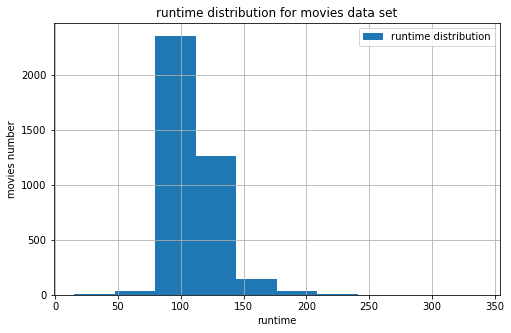

In [26]:
df['runtime'].hist(figsize = (8,5), label = 'runtime distribution' );
plt.title('runtime distribution for movies data set')
plt.xlabel('runtime')
plt.ylabel('movies number')
plt.legend();

Average runtime for a the movies set is 109

In [27]:
df['rating'].min(), df['rating'].max()

(2.2, 8.4)

In [28]:
df['rating'].mean()

6.167134320602757

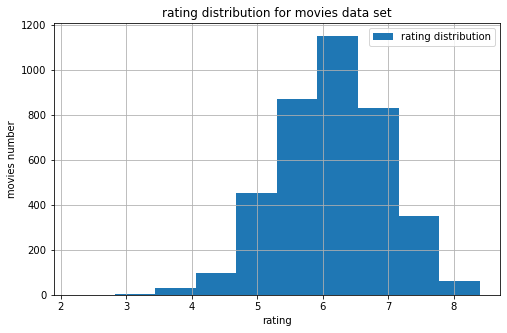

In [29]:
df['rating'].hist(figsize = (8,5), label = 'rating distribution' )
plt.title('rating distribution for movies data set')
plt.xlabel('rating')
plt.ylabel('movies number')
plt.legend();

It appears that most average rating for the movies set is approximately 6.17

In [30]:
df['budget'].min() , df['budget'].max()

(1, 425000000)

In [31]:
df['revenue'].min() , df['revenue'].max()

(2, 2068178225)

Some movies has not cost much along with revenue

In [32]:
df.popularity.mean()

1.1857345770329952

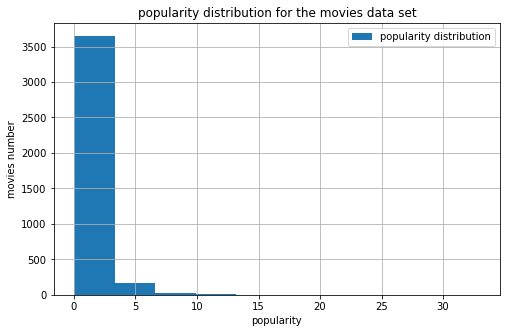

In [33]:
df['popularity'].hist(figsize = (8,5), label = 'popularity distribution');
plt.title('popularity distribution for the movies data set')
plt.xlabel('popularity')
plt.ylabel('movies number')
plt.legend();

popularity skewed right

### Q1 - Does the movies  always financially success ?

In [34]:
# create new field to map our question
df['revenue_exceed_budget'] = np.where(df['revenue'] > df['budget'], True, False)
df['revenue_exceed_budget'].value_counts()

True     2773
False    1076
Name: revenue_exceed_budget, dtype: int64

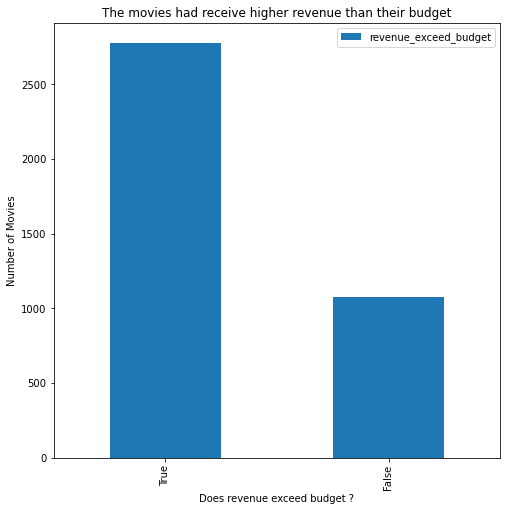

In [35]:
# create bar chart for the field after counting the number of revenues exceeded budgets
df['revenue_exceed_budget'].value_counts().plot(kind = 'bar' , figsize = (8 , 8), xlabel = 'Does revenue exceed budget ?',
                                                ylabel = 'Number of Movies', 
                                                title = 'The movies had receive higher revenue than their budget' )
plt.legend();

It appears that the number of movies that gain profit is more than double to the movies that does not 

### Q2 - What is the profit average ratings and popularity for the movies comparing to losing average  ? 

In [36]:
# group by new field and count the mean rating
df_profitEffect = df.groupby(['revenue_exceed_budget']).mean()['rating']
df_profitEffect

revenue_exceed_budget
False    5.844888
True     6.292175
Name: rating, dtype: float64

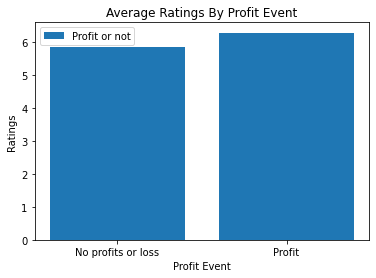

In [37]:
# adjust a bar chart 
locations = [1, 2]
heights = [df_profitEffect[0] , df_profitEffect[1] ]
labels = ['No profits or loss', 'Profit']
plt.bar(locations, heights, tick_label=labels )
plt.title('Average Ratings By Profit Event')
plt.xlabel('Profit Event')
plt.ylabel('Ratings');
plt.legend({'Profit or not'});


make sense, let's histogram it

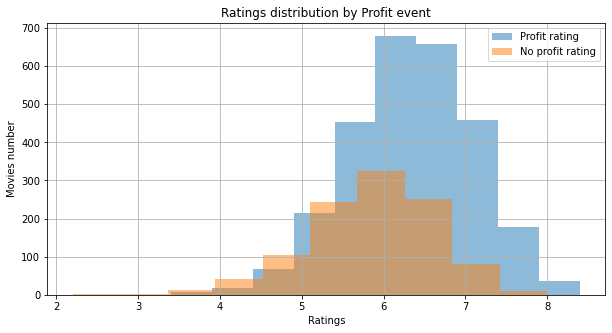

In [38]:
df.rating[df.revenue_exceed_budget == True].hist(alpha = 0.5 , label = 'Profit rating' , figsize = (10,5));
df.rating[df.revenue_exceed_budget == False].hist(alpha = 0.5 , label = 'No profit rating', figsize = (10,5));
plt.title('Ratings distribution by Profit event')
plt.xlabel('Ratings')
plt.ylabel('Movies number');
plt.legend();

The losses movies has more lower ratings than profit ones

Let's see popularity, same proccess going to be done

In [39]:
df_profitEffect = df.groupby(['revenue_exceed_budget']).mean()['popularity']
df_profitEffect

revenue_exceed_budget
False    0.617920
True     1.406062
Name: popularity, dtype: float64

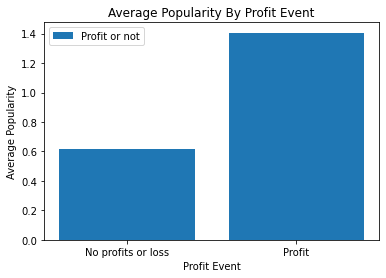

In [40]:
# adjust a bar chart 
locations = [1, 2]
heights = [df_profitEffect[0] , df_profitEffect[1] ]
labels = ['No profits or loss', 'Profit']
plt.bar(locations, heights, tick_label=labels )
plt.title('Average Popularity By Profit Event')
plt.xlabel('Profit Event')
plt.ylabel('Average Popularity');
plt.legend({'Profit or not'});

average popularity for successed movies is more than the average of unseccessed

In [41]:
df.popularity[df.revenue_exceed_budget == True].min() , df.popularity[df.revenue_exceed_budget == True].max()

(0.001117, 32.985763)

In [42]:
df.popularity[df.revenue_exceed_budget == False].min() , df.popularity[df.revenue_exceed_budget == False].max()

(0.015997, 3.9904879999999996)

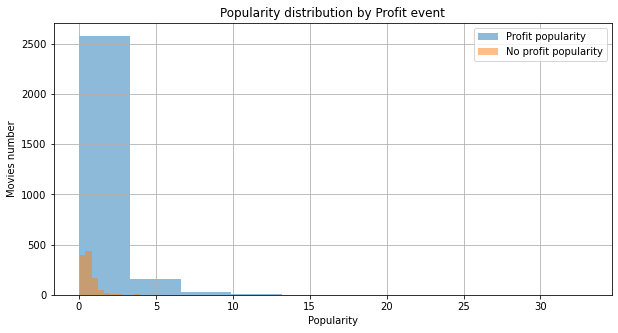

In [43]:
df.popularity[df.revenue_exceed_budget == True].hist(alpha = 0.5 , label = 'Profit popularity' , figsize = (10,5), );
df.popularity[df.revenue_exceed_budget == False].hist(alpha = 0.5 , label = 'No profit popularity', figsize = (10,5));
plt.title('Popularity distribution by Profit event')
plt.xlabel('Popularity')
plt.ylabel('Movies number');
plt.legend();

### Q3 - Is there any relation between popularity and vote counts ?

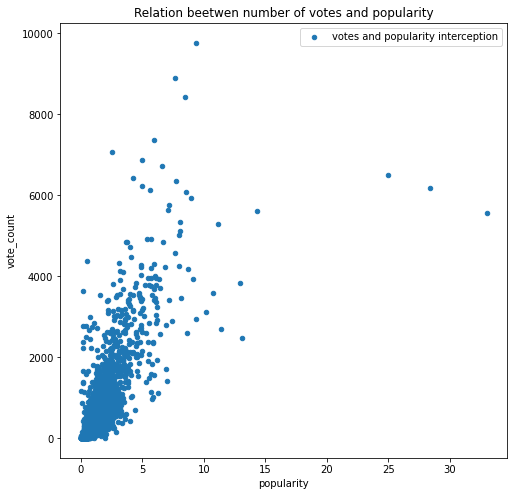

In [44]:
df.plot(kind='scatter', x = 'popularity', y ='vote_count', title='Relation beetwen number of votes and popularity',
        figsize = (8,8));
plt.legend({'votes and popularity interception'});


There is a positive relation

### Q4 - For filmmakers , does the people become hard to satisfy by the time  ?

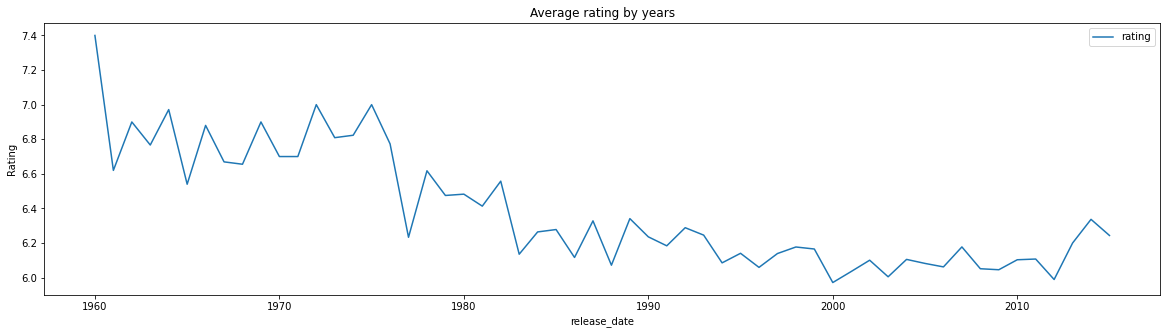

In [45]:
df_averageYearVotes = df.groupby(df['release_date'].dt.year).mean()['rating']
df_averageYearVotes.plot(kind = 'line' , figsize = (20,5) , title = 'Average rating by years', ylabel = 'Rating')
plt.legend();

They Are !

### Q5 - What do people prefer ? Action or Comedy movies ?

In [46]:
# retrive movies has action in genres 
df_action = df[df['genres'].str.contains('Action')]

In [47]:
# retrive movies has comedy in genres 
df_comedy = df[df['genres'].str.contains('Comedy')]

In [48]:
df_action['rating'].mean() , df_comedy['rating'].mean()

(6.034256694367497, 6.026971260132645)

In [49]:
df_action['popularity'].mean() , df_comedy['popularity'].mean()

(1.5501849048938128, 1.0126832269712611)

close average rating values for action and comedies

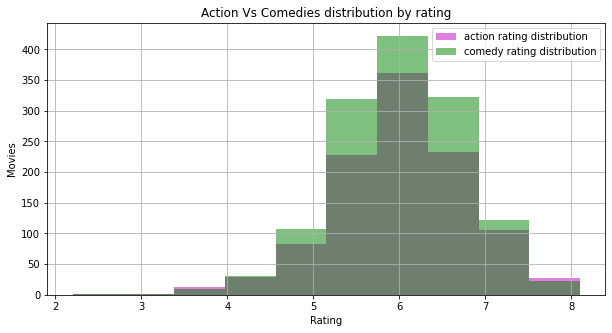

In [50]:
df_action['rating'].hist(alpha = 0.5 , label = 'action rating distribution' , figsize = (10,5) , color = 'm') 
df_comedy['rating'].hist(alpha = 0.5 , label = 'comedy rating distribution' , figsize = (10,5) , color = 'g')
plt.title('Action Vs Comedies distribution by rating' )
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.legend();

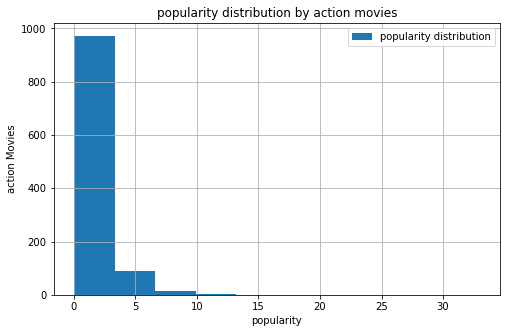

In [51]:
df_action['popularity'].hist(figsize = (8,5), label = 'popularity distribution') ;
plt.title('popularity distribution by action movies' )
plt.xlabel('popularity')
plt.ylabel('action Movies')
plt.legend();

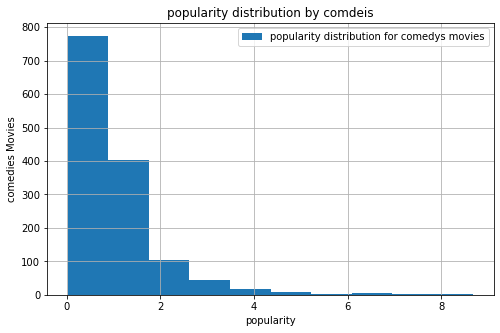

In [52]:
df_comedy['popularity'].hist(figsize = (8,5), label = 'popularity distribution for comedys movies').legend();
plt.title('popularity distribution by comdeis' )
plt.xlabel('popularity')
plt.ylabel('comedies Movies');

some of action movies are more popular than all comedies

## Q6 - Which quarter of the year has more revenue than others

In [53]:
# retrive avearage revenue for each quarter
df_quarterRevenueAvg = df.groupby(df['release_date'].dt.quarter).mean()['revenue']
df_quarterRevenueAvg

release_date
1    8.190492e+07
2    1.395257e+08
3    9.102396e+07
4    1.121962e+08
Name: revenue, dtype: float64

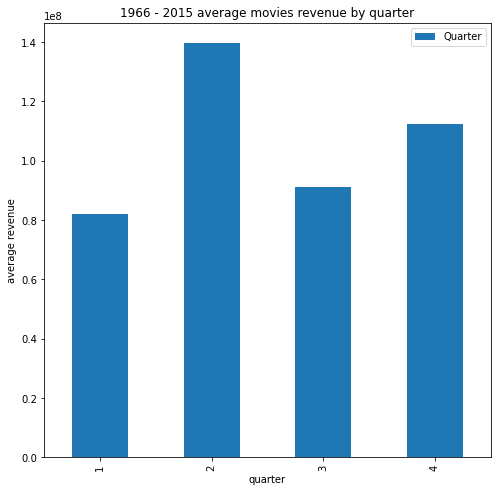

In [54]:
df_quarterRevenueAvg.plot(kind='bar', title = '1966 - 2015 average movies revenue by quarter', figsize = (8,8) , xlabel = 'quarter',
                         ylabel = 'average revenue');
plt.legend({'Quarter'})

The second quarter has more revenue than other quarters

# 4 - Conclusions


There are many more explorations can be performed on the movies set to insight from them.

We can conclude from the exploration that :

- Movies financially succeed is more than double of movies that does not. That reflect on the popularity and ratings.
- Popularity of the new movies is more than the old ones and the same for number of votes
- On average, old movies receive higher ratings than the new
- Average ratings for movies that contains action events similar to the movies containing comedy events but, some action movies is more popular than comedy's
- Movies released in the second quarter has the highest revenue

## Limitations 

- Movies genres can include more than one classification. This affects the results. It would be better if each movie has one main classification
- Values range on some fields are wide. Movies industry has devolved among years and that is clear in some of the data which lead to inaccurate results.